<a href="https://colab.research.google.com/github/rvraghvender/Finance/blob/main/LSTM_stock_price_predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artifical recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation using the past 60 day stock price.

In [ ]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get the stock quote
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader
df = web.DataReader('BTC-USD', data_source='yahoo', start='2012-01-01', end='2021-01-05')

# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014
...,...,...,...,...,...,...
2021-01-02,33155.117188,29091.181641,29376.455078,32127.267578,67865420765,32127.267578
2021-01-03,34608.558594,32052.316406,32129.408203,32782.023438,78665235202,32782.023438
2021-01-04,33440.218750,28722.755859,32810.949219,31971.914062,81163475344,31971.914062


In [ ]:
# Get the number of rows and columns in the data set
df.shape

(2304, 6)

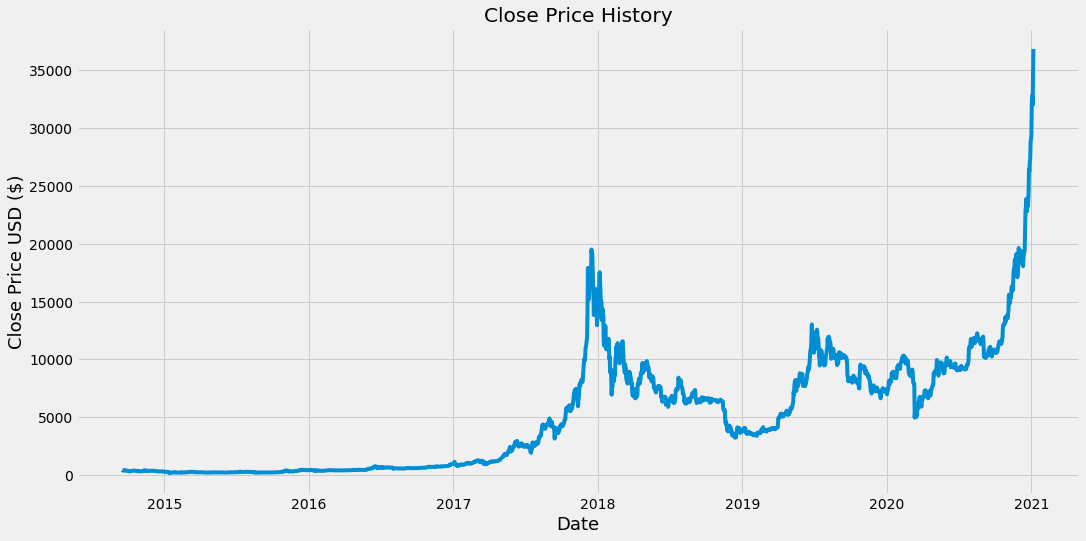

In [ ]:
# Visualise the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to the numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len 

1844

In [ ]:
# Scale the data (Preprocessing transformation)
scaler = MinMaxScaler(feature_range=(0,1))  # Scale the data between 0 and 1
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00761963],
       [0.00672202],
       [0.0059131 ],
       ...,
       [0.86758678],
       [0.92272244],
       [1.        ]])

In [ ]:
# Create the training data set

# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

  if i <= 61:
    print(x_train)
    print(y_train)
  

[array([0.00761963, 0.00672202, 0.0059131 , 0.00629808, 0.00602293,
       0.00611383, 0.00703177, 0.00668832, 0.00637094, 0.00617586,
       0.00604201, 0.00543242, 0.00538565, 0.00569884, 0.00560799,
       0.00537487, 0.00495027, 0.00411401, 0.00388599, 0.00414711,
       0.00431378, 0.00477094, 0.00510074, 0.00500621, 0.00502633,
       0.00546975, 0.00579352, 0.00607885, 0.00591247, 0.0055791 ,
       0.0056119 , 0.00582158, 0.00576984, 0.00558698, 0.00568604,
       0.00559552, 0.00492039, 0.00491843, 0.00461624, 0.00481907,
       0.00477227, 0.00489859, 0.00429752, 0.00456259, 0.00437202,
       0.00402895, 0.00403285, 0.00407821, 0.00415838, 0.00440381,
       0.00467134, 0.00448373, 0.00456759, 0.00505266, 0.00515253,
       0.00517357, 0.00669804, 0.00662092, 0.00599556, 0.00540383])]
[0.005724431089858943]
[array([0.00761963, 0.00672202, 0.0059131 , 0.00629808, 0.00602293,
       0.00611383, 0.00703177, 0.00668832, 0.00637094, 0.00617586,
       0.00604201, 0.00543242, 0.00

In [ ]:

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#  Reshape the data as our LSTM model requires 3-D data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1784, 60, 1)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1) ))   # 50 being the number of neurons
model.add(LSTM(50, return_sequences=False))   # since we have already created the LSTM model
model.add(Dense(25)) # Here the numnber of neurons are 25
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1784/1784 [==============================] - 49s 26ms/step - loss: 6.6811e-04


In [ ]:
# Create the testing dataset

# Create a new array scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]

# Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
# Convert the data to numpy array (to use it in LSTM model)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the models predcited price values
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction) # Unscalling the values

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(prediction - y_test)**2)
rmse

378.46373768682065

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


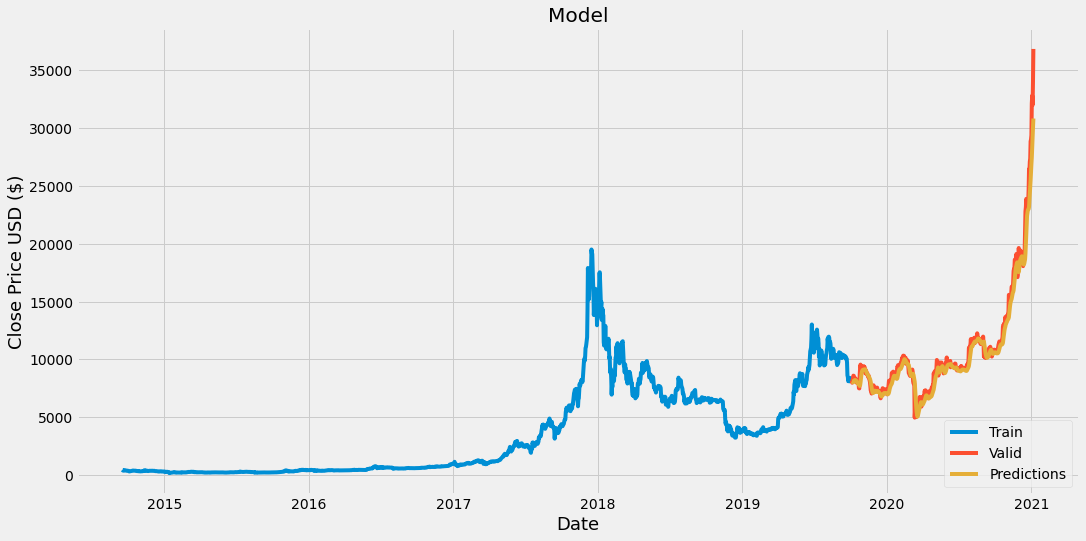

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = prediction

# Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-10-05,8151.500488,8111.516113
2019-10-06,7988.155762,8095.466797
2019-10-07,8245.623047,8047.380859
2019-10-08,8228.783203,8029.852051
2019-10-09,8595.740234,8026.725098
...,...,...
2021-01-02,32127.267578,27445.185547
2021-01-03,32782.023438,28366.849609
2021-01-04,31971.914062,29368.947266


In [ ]:
# Get the quote
share_quote = web.DataReader('BTC-USD', data_source='yahoo', start='2012-01-01', end='2021-01-05')

# Create the new dataframe
new_df = share_quote.filter(['Close'])

# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Creat the empty list
X_test = []

# Append the past 60 days 
X_test.append(last_60_days_scaled)

# Convert the X_test to a numpy array
X_test = np.array(X_test)

# Reshape the data to use in LSTM model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scale price
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[31989.816]]


In [ ]:
# Get the quote
share_quote2 = web.DataReader('BTC-USD', data_source='yahoo', start='2021-01-05', end='2021-01-05')
print(share_quote2['Close'])

Date
2021-01-05    33992.429688
2021-01-06    36824.363281
Name: Close, dtype: float64
